# Spectrogram Data 
## Cocaine study  <br>

### Notes:
* many ways to setup data...
* Need to run exploratory analysis on variables
* plot, plot, plot 
* pre/post comparison
* run classification model

In [111]:
import os, glob
import seaborn as sns

import pandas as pd
from IPython.core import display as ICD
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
%matplotlib inline


In [112]:
specto_data_path = '/Users/nikkibytes/Documents/git_nibl/mouse_dir/Spectrogram_data'
coher_data_path = '/Users/nikkibytes/Documents/git_nibl/mouse_dir/Coherence_Data'

coher_data_files = sorted(glob.glob(os.path.join(coher_data_path, "*")))
coher_dict = {}

specto_data_files = glob.glob(os.path.join(specto_data_path, "*"))
specto_dict={}



In [113]:
for file in coher_data_files:
    curr_df = pd.read_csv(file)
    ##fig = plt.figure()
    curr_df = curr_df.rename(columns={"Unnamed: 0":"Time (s)"})
    corr =  curr_df.corr()
    file_name=file.split("/")[-1]
    #sns.heatmap(corr, 
     #       xticklabels=corr.columns.values,
      #      yticklabels=corr.columns.values)
    coher_dict[file_name] = curr_df
    try:
        
        if "OFC-DMS" in file_name:
            pass
            #print(file_name)
            #plt.plot(curr_df['Unnamed: 0'], curr_df['OFC1 gamma'])
            #plt.title(file.split("/")[-1])
        else:
            pass
            #print(file_name)
            #plt.plot(curr_df['Unnamed: 0'], curr_df['BLA2 gamma'])
            #plt.title(file.split("/")[-1])
    except:
        pass
        #print("\nDATA FILE: {}\n".format(file.split("/")[-1]))


In [114]:
for file in specto_data_files:
    curr_df = pd.read_csv(file)
    #print("\nDATA FILE: {}\n".format(file.split("/")[-1]))
    #ICD.display(curr_df.head())
    #fig = plt.figure()
    
    file_name = file.split("/")[-1]
    specto_dict[file_name] = curr_df

    #print(file.split("/")[-1])
    try:
        
        if "OFC-DMS" in file_name:
            pass
            #print(curr_df.columns.values)
            #print(file_name)
            #plt.plot(curr_df['Time (s)'], curr_df['OFC1 gamma'])
            #plt.title(file.split("/")[-1])
        else:
            pass
            #print(file_name)
            #plt.plot(curr_df['Time (s)'], curr_df['BLA2 gamma'])
            #plt.title(file.split("/")[-1])
    except:
        print("\nDATA FILE: {}\n".format(file.split("/")[-1]))

    
#curr_df.columns.values

In [115]:
coher_dict.keys()

dict_keys(['OFC-DMS mouse2 post-cocaine.csv', 'OFC-DMS mouse2 pre-cocaine.csv', 'OFC-DMS mouse3 post-cocaine.csv', 'OFC-DMS mouse3 pre-cocaine.csv', 'OFC-DMS mouse4 post-cocaine.csv', 'OFC-DMS mouse4 pre-cocaine.csv', 'multisite mouse1 post-cocaine.csv', 'multisite mouse1 pre-cocaine.csv', 'multisite mouse2 post-cocaine.csv', 'multisite mouse2 pre-cocaine.csv'])

In [116]:
specto_dict.keys()

dict_keys(['multisite mouse1 (recording 1) post-cocaine.csv', 'OFC-DMS mouse4 post-cocaine.csv', 'multisite mouse2 (recording 2) pre-cocaine.csv', 'OFC-DMS mouse2 pre-cocaine.csv', 'multisite mouse1 (recording 1) pre-cocaine.csv', 'OFC-DMS mouse4 pre-cocaine.csv', 'multisite mouse1 (recording 2) post-cocaine.csv', 'OFC-DMS mouse3 pre-cocaine.csv', 'OFC-DMS mouse2 post-cocaine.csv', 'multisite mouse2 (recording 2) post-cocaine.csv', 'multisite mouse2 (recording 1) pre-cocaine.csv', 'multisite mouse2 (recording 1) post-cocaine.csv', 'OFC-DMS mouse3 post-cocaine.csv', 'multisite mouse1 (recording 2) pre-cocaine.csv'])

In [133]:
df1 = specto_dict['multisite mouse2 (recording 1) pre-cocaine.csv']
df2 = coher_dict['multisite mouse2 post-cocaine.csv']

In [136]:
ICD.display(df1.head())
ICD.display(df2.head())

,Time (s),VTA1 theta,VTA1 beta,VTA1 gamma,VTA2 theta,VTA2 beta,VTA2 gamma,VTA3 theta,VTA3 beta,VTA3 gamma,...,PFC2 theta,PFC2 beta,PFC2 gamma,PFC3 theta,PFC3 beta,PFC3 gamma,PFC4 theta,PFC4 beta,PFC4 gamma,Speed (cm/s)
0,0,6.835938,21.484375,65.429688,-37.395231,-46.650116,-57.331531,-42.297850,-50.803080,-57.626886,...,-33.899765,-46.102518,-53.599358,-34.263811,-48.395440,-53.327235,-37.207791,-49.070831,-53.245374,0.471733
1,1,-43.384101,-50.381745,-55.697538,-41.351825,-48.122481,-59.439353,-35.055402,-50.348070,-57.590606,...,-36.463143,-46.210880,-56.201819,-37.827440,-48.102625,-54.494331,-36.231735,-45.139232,-54.504602,0.461540
2,2,-40.397161,-55.154873,-57.727934,-40.102803,-49.668890,-58.937540,-46.676072,-50.990005,-59.620383,...,-36.757618,-45.097984,-53.653511,-35.828951,-41.423565,-53.074869,-36.383285,-44.287297,-53.748591,0.484639
3,3,-40.560837,-50.515331,-56.477079,-41.899347,-48.590387,-60.138033,-34.204016,-44.588033,-57.168553,...,-39.078745,-42.623996,-52.406816,-40.501337,-46.072940,-53.700125,-43.813734,-48.291125,-52.444071,0.518622
4,4,-43.062470,-51.794588,-58.513022,-43.429995,-49.883408,-60.474030,-39.490240,-49.381475,-57.533368,...,-35.500267,-44.645900,-55.063997,-46.204642,-46.772594,-55.911008,-37.510295,-47.317414,-53.770369,0.518006


,Time (s),VTA1 theta,VTA1 beta,VTA1 gamma,VTA2 theta,VTA2 beta,VTA2 gamma,VTA3 theta,VTA3 beta,VTA3 gamma,...,PFC1 gamma,PFC2 theta,PFC2 beta,PFC2 gamma,PFC3 theta,PFC3 beta,PFC3 gamma,PFC4 theta,PFC4 beta,PFC4 gamma
0,0,-37.677696,-49.026131,-54.576533,-36.333989,-47.487348,-52.875715,-37.307426,-47.821026,-54.115931,...,-51.920539,-35.087483,-47.472109,-51.899034,-35.102077,-47.426663,-51.949887,-35.176360,-47.417789,-51.964477
1,1,-33.857830,-51.120186,-55.043276,-33.340180,-50.019954,-53.201918,-34.189535,-50.219785,-54.046592,...,-52.651029,-33.546254,-48.790238,-52.599307,-33.620186,-48.468371,-52.622760,-33.691246,-48.814421,-52.681356
2,2,-29.423282,-45.567926,-48.565987,-31.406662,-45.714859,-49.050138,-31.677045,-46.072955,-49.168454,...,-48.465589,-33.582821,-45.907465,-48.411860,-33.477415,-45.834470,-48.424095,-33.610846,-45.875899,-48.438801
3,3,-26.746802,-46.090834,-53.159122,-31.935270,-45.851328,-53.014358,-31.777778,-46.194791,-52.874857,...,-51.759537,-30.884524,-46.661384,-51.817476,-30.914053,-46.570566,-51.736393,-31.101455,-46.623767,-51.821141
4,4,-32.671150,-47.960139,-53.816253,-31.614975,-46.019215,-52.856634,-32.473030,-46.521113,-53.579331,...,-51.849156,-31.987215,-47.480161,-51.820532,-31.904095,-47.477537,-51.823574,-31.968702,-47.592017,-51.876759


In [166]:
#df1.columns.values
gamma_cols = [x for x in df1.columns.values if "gamma" in x]
theta_cols = [x for x in df1.columns.values if "theta" in x]
beta_cols = [x for x in df1.columns.values if "beta" in x]


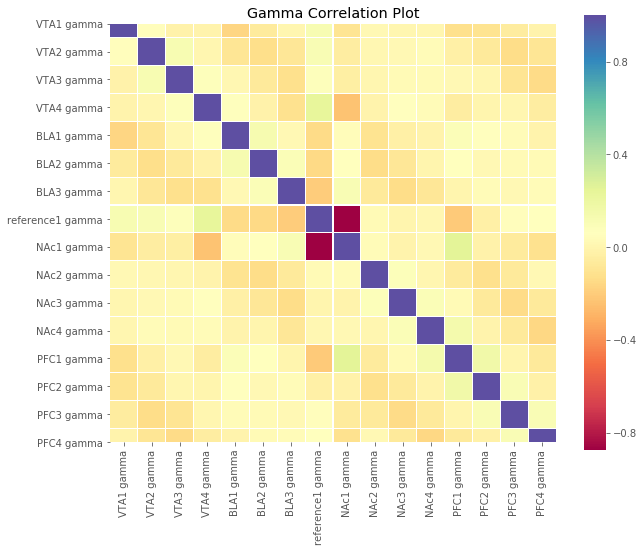

In [172]:

f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Gamma Correlation Plot')
corr = df1[gamma_cols].corr()
sns.heatmap(corr, cmap="Spectral",linewidths=.1, linecolor='white', mask=np.zeros_like(corr, dtype=np.bool),
            square=True, ax=ax)



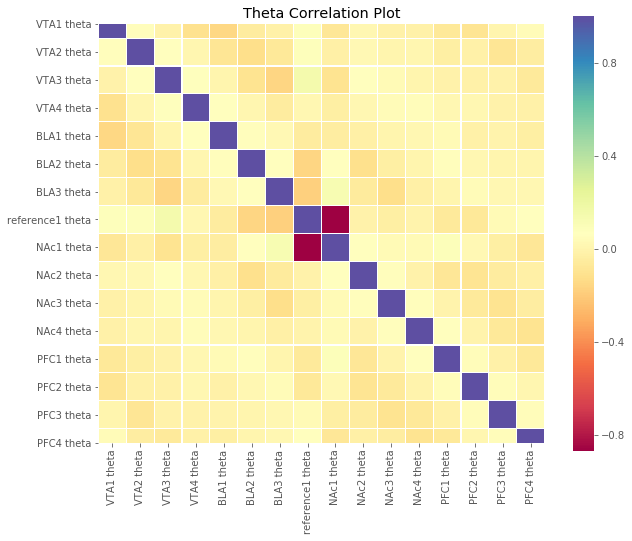

In [171]:

f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Theta Correlation Plot')
corr = df1[theta_cols].corr()
sns.heatmap(corr, cmap="Spectral",linewidths=.1, linecolor='white', mask=np.zeros_like(corr, dtype=np.bool),
            square=True, ax=ax)



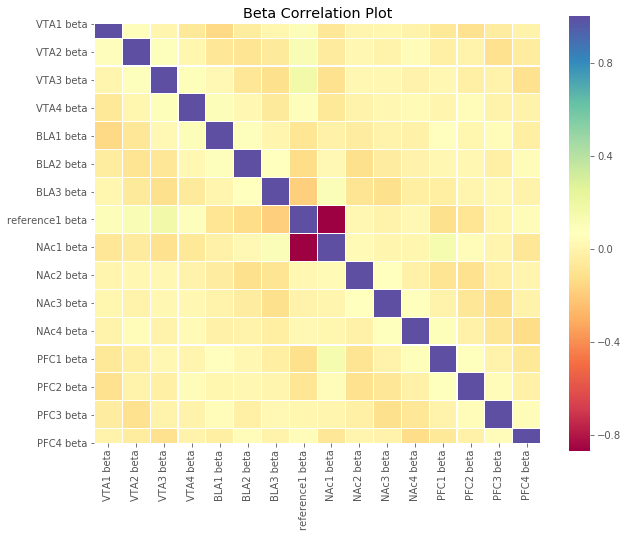

In [173]:

f, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Beta Correlation Plot')
corr = df1[beta_cols].corr()
sns.heatmap(corr, cmap="Spectral",linewidths=.1, linecolor='white', mask=np.zeros_like(corr, dtype=np.bool),
            square=True, ax=ax)



### Notes:   
Combine regions to compare? 